In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load cleaned data
df = pd.read_csv('/Users/rutujashingate/Desktop/sleep-ml-project/data/processed/clean_smartwatch.csv')
print("Cleaned Data Loaded:", df.shape)

📄 Cleaned Data Loaded: (20000, 45)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         20000 non-null  object 
 1   date_recorded                   20000 non-null  object 
 2   sleep_start_timestamp           20000 non-null  object 
 3   sleep_end_timestamp             20000 non-null  object 
 4   duration_minutes                20000 non-null  int64  
 5   sleep_latency_minutes           20000 non-null  int64  
 6   wake_after_sleep_onset_minutes  20000 non-null  int64  
 7   sleep_efficiency                20000 non-null  float64
 8   sleep_score_raw                 20000 non-null  int64  
 9   sleep_stage_deep_pct            20000 non-null  float64
 10  sleep_stage_light_pct           20000 non-null  float64
 11  sleep_stage_rem_pct             20000 non-null  float64
 12  sleep_stage_awake_pct           

,duration_minutes,sleep_latency_minutes,wake_after_sleep_onset_minutes,sleep_efficiency,sleep_score_raw,sleep_stage_deep_pct,sleep_stage_light_pct,sleep_stage_rem_pct,sleep_stage_awake_pct,heart_rate_mean,...,height_cm,bedtime_consistency_std_min,stress_score,activity_before_bed_min,screen_time_before_bed_min,insomnia_flag,apnea_risk_score,nap_duration_minutes,sleep_start_hour,sleep_day
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,449.188850,9.660300,19.5573,0.933189,57.861950,0.179585,0.520620,0.199288,0.100505,60.059010,...,170.43094,32.783585,34.819750,40.952350,56.1891,0.021200,12.32130,4.452400,16.478450,3.011350
std,71.884421,10.171415,19.7675,0.052726,5.368606,0.059015,0.063729,0.049047,0.069600,7.507331,...,9.72220,21.144093,17.490442,27.652919,36.9583,0.144054,10.86883,4.893223,9.312044,1.990859
min,151.000000,0.000000,0.0000,0.595000,31.000000,0.050000,0.271000,0.080000,0.000000,36.400000,...,139.30000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,400.000000,2.000000,5.0000,0.910000,55.000000,0.139000,0.477000,0.166000,0.050000,54.900000,...,163.60000,15.700000,22.000000,20.000000,28.0000,0.000000,3.00000,1.000000,3.750000,1.000000
50%,449.000000,7.000000,13.0000,0.947000,58.000000,0.180000,0.522000,0.200000,0.081000,60.000000,...,170.70000,30.400000,34.000000,39.000000,55.0000,0.000000,11.00000,3.000000,21.000000,3.000000
75%,498.000000,13.000000,28.0000,0.971000,62.000000,0.220000,0.565000,0.233000,0.140000,65.200000,...,176.80000,47.000000,47.000000,60.000000,82.0000,0.000000,19.00000,6.000000,22.000000,5.000000
max,720.000000,102.000000,141.0000,1.000000,76.000000,0.350000,0.762000,0.300000,0.428000,98.400000,...,202.40000,123.300000,100.000000,157.000000,210.0000,1.000000,59.00000,43.000000,23.000000,6.000000


/Users/rutujashingate/Desktop/sleep-ml-project/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


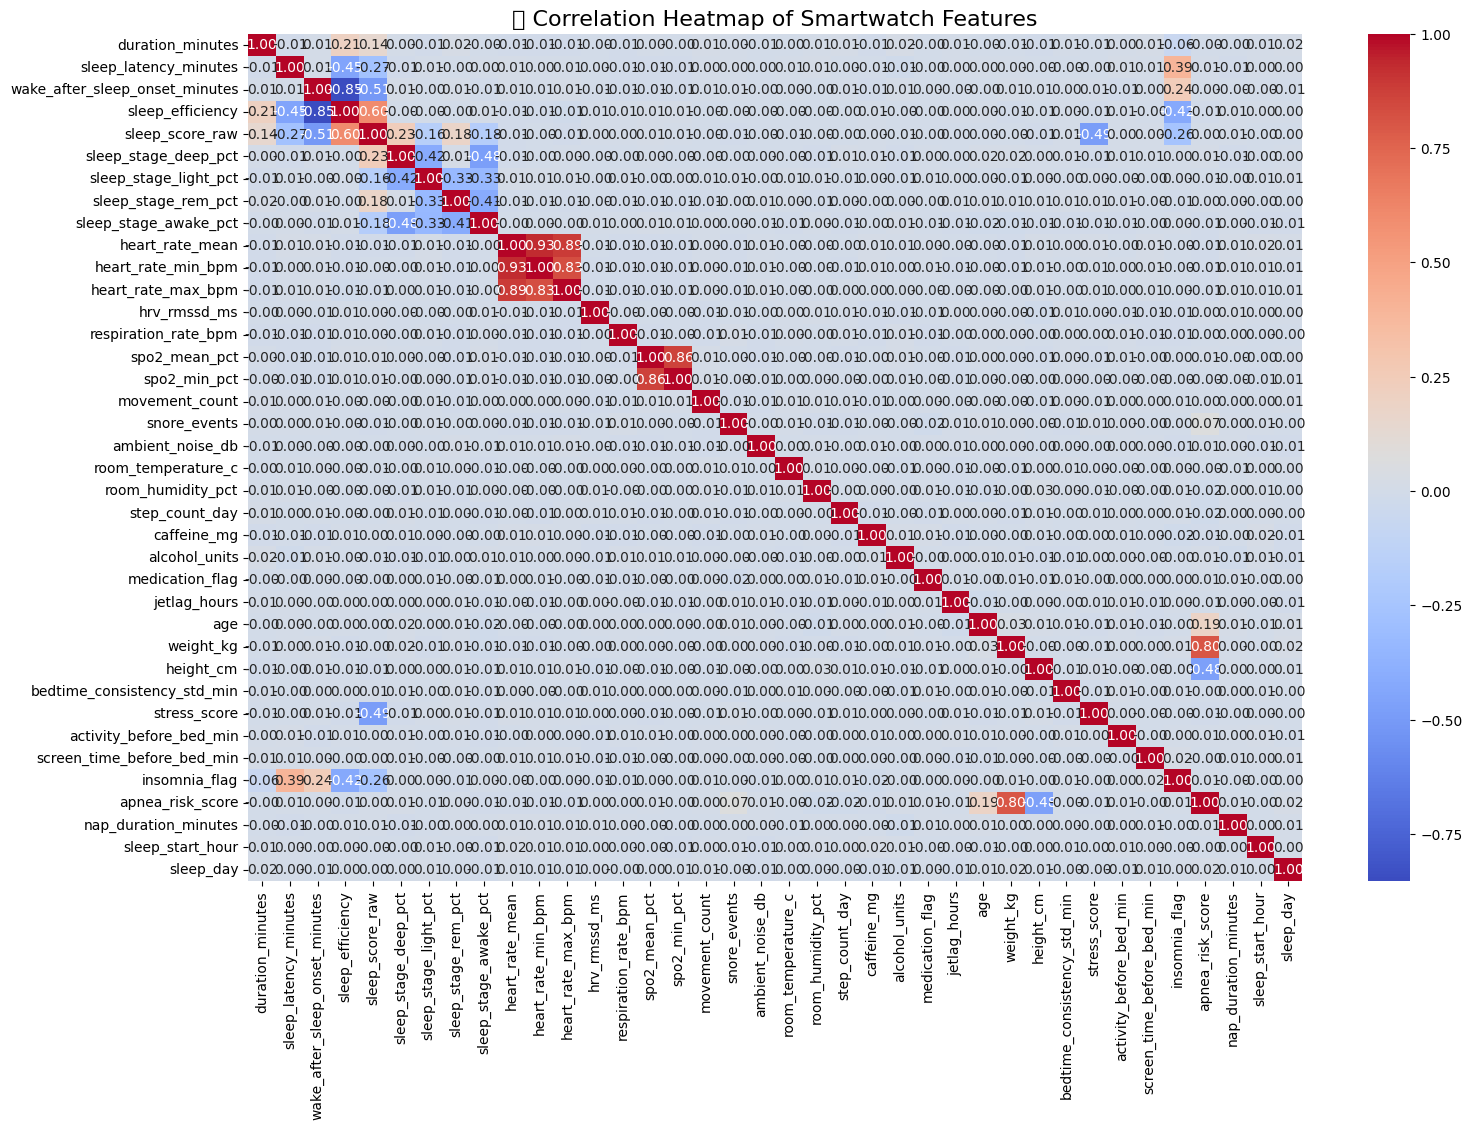

In [5]:
#Correlation heatmap
plt.figure(figsize=(17, 11))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("🔍 Correlation Heatmap of Smartwatch Features", fontsize=16)
plt.show()

In [ ]:
# Top correlated features with sleep_score
target = 'sleep_score_raw'
corrs = df.corr(numeric_only=True)[target].drop(target)
top_corr = corrs.sort_values(key=abs, ascending=False).head(10)

print("📊 Top 10 correlated features with sleep_score:\n")
print(top_corr)

📊 Top 10 correlated features with sleep_score:

sleep_efficiency                  0.601833
wake_after_sleep_onset_minutes   -0.508342
stress_score                     -0.488698
sleep_latency_minutes            -0.272352
insomnia_flag                    -0.256583
sleep_stage_deep_pct              0.233924
sleep_stage_rem_pct               0.178063
sleep_stage_awake_pct            -0.176142
sleep_stage_light_pct            -0.161296
duration_minutes                  0.139026
Name: sleep_score_raw, dtype: float64


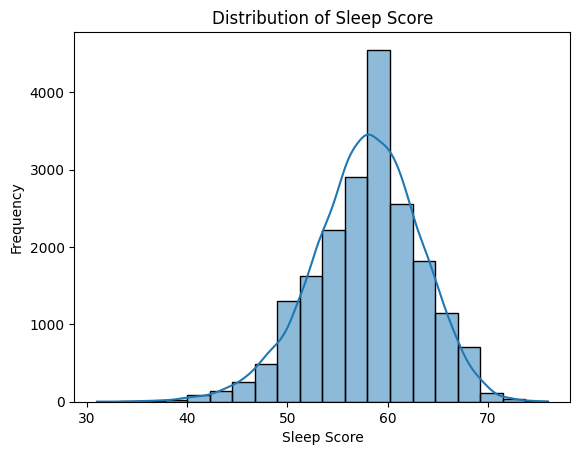

In [ ]:
# Plot sleep score distribution
sns.histplot(df['sleep_score_raw'], bins=20, kde=True)
plt.title("Distribution of Sleep Score")
plt.xlabel("Sleep Score")
plt.ylabel("Frequency")
plt.show()

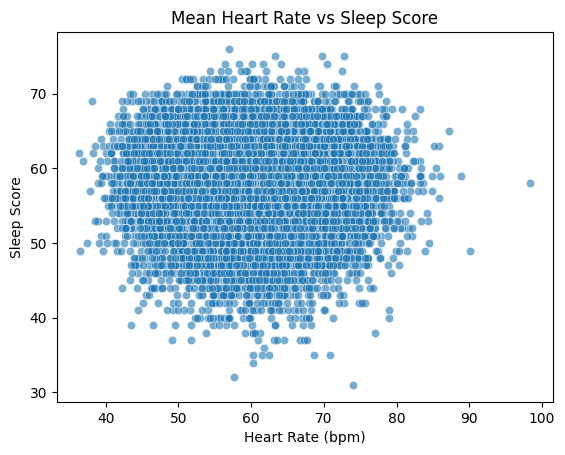

In [9]:
# 4️⃣ Scatterplot: heart rate vs sleep score
sns.scatterplot(data=df, x='heart_rate_mean', y='sleep_score_raw', alpha=0.6)
plt.title("Mean Heart Rate vs Sleep Score")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Sleep Score")
plt.show()